In [1]:
from sklearn.datasets import make_regression
import numpy as np

In [2]:
X,y = make_regression(n_samples=4,n_features=1,n_informative=1,n_targets=1,noise=80,random_state=13)

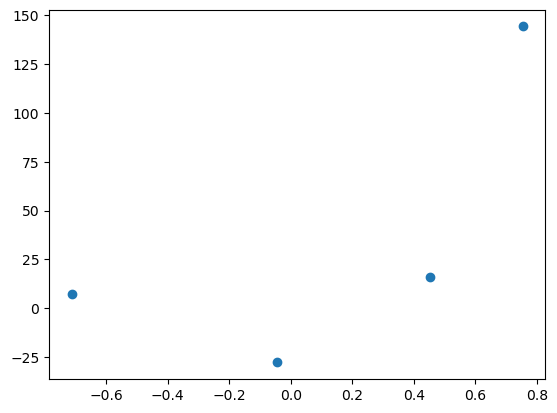

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [7]:
# If we apply OLS
from sklearn.linear_model import LinearRegression

In [8]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [9]:
reg.coef_

array([78.35063668])

In [10]:
reg.intercept_

26.15963284313262

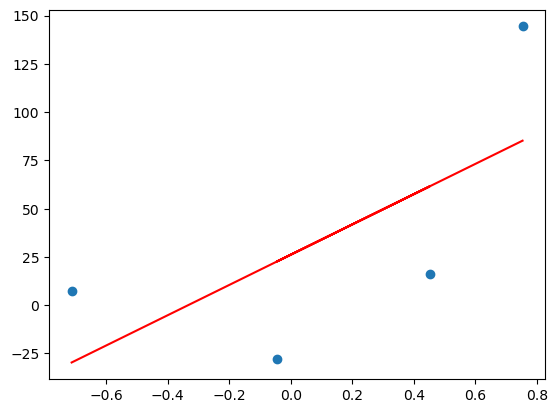

In [13]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')

In [14]:
# Now let's apply gradient descent -> m = 78.35 constant and b = 0 assumed initially
y_pred = ((78.35*X) + 0).reshape(4)

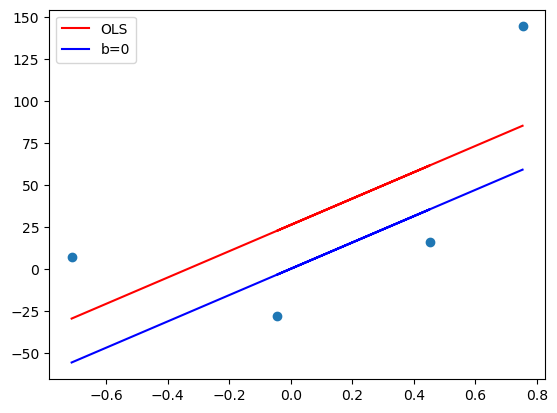

In [17]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='blue',label='b=0')
plt.legend()

In [20]:
m=78.35
b=0

loss_slope = -2*np.sum(y-m*X.ravel() - b)
loss_slope

-209.27763408209216

In [23]:
# lets assume learning rate as 0.1
lr = 0.1

step_size = lr*loss_slope
step_size

-20.927763408209216

In [24]:
# calculating new intercept
b = b - step_size
b

20.927763408209216

In [25]:
y_pred1 = ((78.35*X) + b).reshape(4)

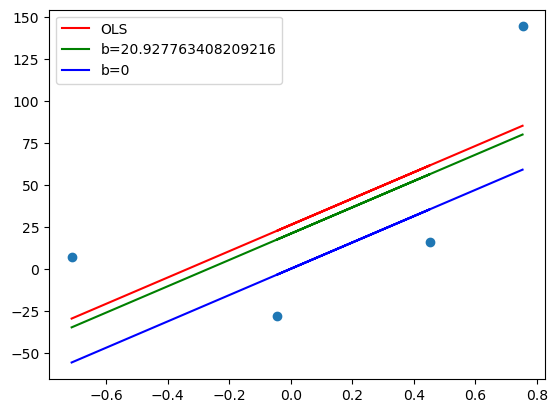

In [26]:
#Code after performing as single iteration
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='green',label='b={}'.format(b))
plt.plot(X,y_pred,color='blue',label='b=0')
plt.legend()

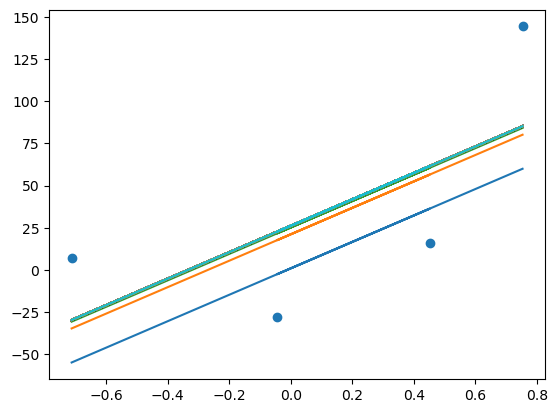

In [28]:
# If we run a loop
b = -100
m = 78.35
lr = 0.1

epochs = 100

for i in range(epochs):
    loss_slope = -2*np.sum(y-m*X.ravel() - b)
    b = b - (lr*loss_slope)
    
    y_pred = m * X + b
    
    plt.plot(X,y_pred)

plt.scatter(X,y)

# Creating our own class to calculate Gradient Descent

In [29]:
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20)

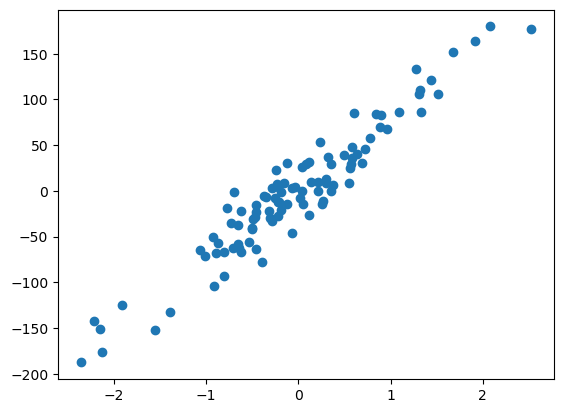

In [30]:
plt.scatter(X,y)

In [32]:
reg.fit(X,y)

LinearRegression()

In [33]:
reg.coef_

array([76.43675155])

In [34]:
reg.intercept_

1.3721821006874566

In [35]:
m = 76.43

In [41]:
class GDRegressor():
    def __init__(self,lr,epochs):
        self.m = 100
        self.b = -120
        self.lr = lr
        self.epochs = epochs
    
    def fit(self,X,y):
        # calculate b using gradient descent
        for i in range(self.epochs):
            loss_slope_b = -2*np.sum(y- self.m * X.ravel() - self.b)
            loss_slope_m = -2*np.sum((y- self.m * X.ravel() - self.b) * X.ravel())
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        
        print(self.b)
        print(self.m)

In [42]:
gd = GDRegressor(0.001,100)
gd.fit(X,y)

1.372182042514633
76.43675138245383


In [ ]:
# Class to calcualte N dimension Gradient Descent
class GDRegressor:
    
    def __init__(self,learning_rate=0.01,epochs=100):
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            # update all the coef and the intercept
            y_hat = np.dot(X_train,self.coef_) + self.intercept_
            #print("Shape of y_hat",y_hat.shape)
            intercept_der = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)
            
            coef_der = -2 * np.dot((y_train - y_hat),X_train)/X_train.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_der)
        
        print(self.intercept_,self.coef_)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_